In [27]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
X = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
X["B"] = (X["A"]) *6

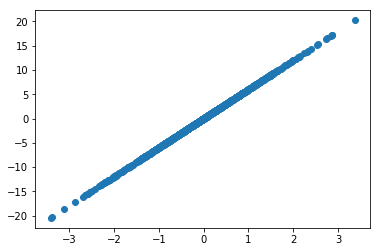

In [29]:
plt.plot(X.A, X.B, "o")

In [30]:
def relu(x):
    return(x * (x > 0))

Yes. Keras initializes some negative and some positive weights, randomly by default -- you can also specify how the weights are initialized [link] (https://keras.io/initializers/). I think that you're right that some nodes could be dead at the start, if the incoming weights sum up to a value less than 0

In [31]:
from keras.backend import clear_session
clear_session()

In [32]:
aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)

In [45]:
import keras.backend as K

# examples of custom loss functions
def my_loss(y_true, y_pred):
    # this example is mean squared error
    # works if if y_pred and y_true are greater than 1D
    return K.mean(K.square(y_pred - y_true))

def my_loss(y_true, y_pred):
    # calculate mean(abs(y_pred1*y_pred2 - y_true1*ytrue2)) 
    return K.mean(K.abs(K.prod(y_pred, axis = 1) - K.prod(y_true, axis = 1)))

AE = Model(aeInput, aeOutput, name="autoencoder")
AE.compile(optimizer='adam', loss=my_loss, )

In [46]:
import tensorflow as tf

y_true = np.random.rand(100, 2) + 1
y_pred = np.random.rand(100, 2) + 1

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

0.7078625808863745


In [48]:
wts = [np.array([[4,  5 ],
        [2, 6]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[1, 1],
        [1, 1 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [49]:

AE.get_weights()

[array([[4., 5.],
        [2., 6.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1., 1.],
        [1., 1.]], dtype=float32),
 array([0., 0.], dtype=float32)]

Epoch 1/10
1000/1000 [==============================] - 0s 49us/step - loss: 3.7275
Epoch 2/10
1000/1000 [==============================] - 0s 40us/step - loss: 3.7264
Epoch 3/10
1000/1000 [==============================] - 0s 37us/step - loss: 3.7256
Epoch 4/10
1000/1000 [==============================] - 0s 48us/step - loss: 3.7245
Epoch 5/10
1000/1000 [==============================] - 0s 42us/step - loss: 3.7265
Epoch 6/10
1000/1000 [==============================] - 0s 41us/step - loss: 3.7232
Epoch 7/10
1000/1000 [==============================] - 0s 40us/step - loss: 3.7235
Epoch 8/10
1000/1000 [==============================] - 0s 38us/step - loss: 3.7217
Epoch 9/10
1000/1000 [==============================] - 0s 41us/step - loss: 3.7207
Epoch 10/10
1000/1000 [==============================] - 0s 44us/step - loss: 3.7217


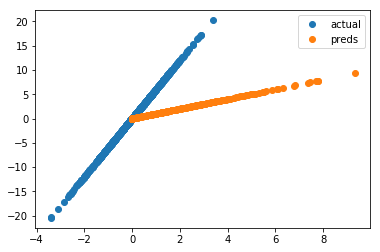

In [145]:
TrainAE = AE.fit( x=X, y=X, epochs=10, batch_size=2**6)
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [51]:
AE.evaluate(X, X)

1000/1000 [==============================] - 0s 64us/step


1405.17578125

In [52]:
import tensorflow as tf

y_true = X.astype("float32")
y_pred = AE.predict(X).astype("float32")

print(tf.Session().run((my_loss(y_true, y_pred))))

1405.1758


In [26]:
y_true = X
y_pred = AE.predict(X)

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

ValueError: Tensor conversion requested dtype float32 for Tensor with dtype float64: 'Tensor("Prod_33:0", shape=(1000,), dtype=float64)'

In [24]:
AE.predict(X).shape

(1000, 2)

In [ ]:
wts = AE.get_weights()
wts = [np.array([[-0,  -0 ],
        [ -0, -0]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[ 0,  0 ],
        [ 0 , 0 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:
wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

In [ ]:
AE.predict(np.array([[-0.9, -0.33]]))

In [ ]:
AE.predict(X).shape

In [ ]:
LayerValues = []
    
inputData= np.array([[1, -0.9, -0.33]])
LayerValues.append(inputData)

jj = 0

wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

nextLayer = np.dot(LayerValues[jj], wtsConcatenated[jj]).astype("float32")
nextLayer = np.hstack([np.array([1], dtype = "float32").reshape(-1,1), nextLayer] )
nextLayer = relu(nextLayer) # apply relu
print(nextLayer)
jj = 1
nextLayer = np.dot(np.array([nextLayer]), wtsConcatenated[jj]).astype("float32")
relu(nextLayer)

In [ ]:
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot( X.A, X.B, shade=False, axis=ax)
sns.kdeplot(AE.predict(X)[:,0], AE.predict(X)[:,1], shade=False, axis=ax)

In [ ]:
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o")

In [ ]:
from PIL import Image
import numpy as np
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((50,50))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
plt.savefig('your_file.tif')

In [ ]:
import cv2

BLACK_MIN = np.array([0, 20, 20], np.uint8)
BLACK_MAX = np.array([120, 255, 255], np.uint8)
imgg = cv2.imread('your_file.tif', 1)
dst = cv2.inRange(imgg, BLACK_MIN, BLACK_MAX)

no_black = cv2.countNonZero(dst)

print('The number of black pixels is: ' + str(no_black))

In [ ]:
imgg

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imgg)